Iteration:  0
Arrived at final approximation to the posterior distribution
Adding labels


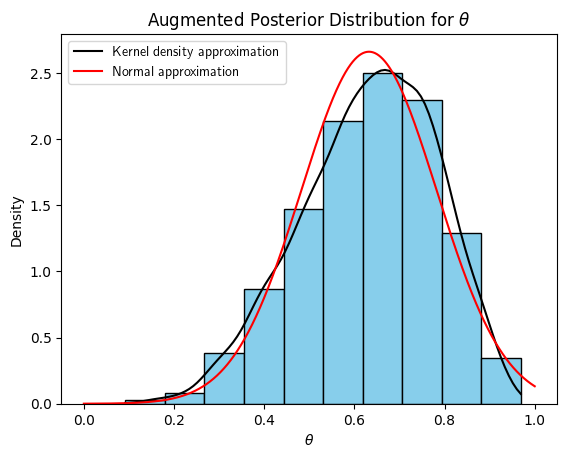

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
# import matplotlib as mpl
from scipy.stats import gaussian_kde
from scipy.stats import norm

## Data imputation algorithm

# Idea is that over iterations, you are updating your current approximation to the posterior distribution
# And over imputations, you are generating a sample from the current approximation to the posterior distribution
# So, each imputation is generated from the current approximation to the posterior distribution

## Genetic linkage example

# Observed data Y = (125, 18, 20, 34)
# For mini genetic linkage model Y = (14, 0, 1, 5)
# And the last observed data option is Y = (13, 1, 2, 3)
# Assuming uniform prior on theta

y1, y2, y3, y4 = [13, 1, 2, 3]

numIterations = 100
numImputations = 5000
posteriorApproximations = np.zeros([numIterations, numImputations])
randomIndices = random.choices(range(numImputations), k = numIterations)
currentTheta = np.random.uniform(0, 1, numImputations)

for iiIteration in range(numIterations):

    # Display every n'th iteration

    if iiIteration % 100 == 0:
        
        print('Iteration: ', iiIteration)

    # Generate m imputations / latent variables from the current posterior distribution (represented by a sample of thetas not just one theta)

    currentImputations = np.zeros([numImputations])

    for jjImputation in range(numImputations):

        thetaStar = currentTheta[jjImputation]
        currentImputations[jjImputation] = np.random.binomial(y1, thetaStar / (thetaStar + 2), 1)

    # Now sample theta star from Beta(v1, v2) where v1 = x2 + y4 + 1 and v2 = y2 + y3

    for jjImputation in range(numImputations):

        currentLatentVariable = currentImputations[random.randint(0, numImputations - 1)] # drawn from the conditional predictive distribution given the current approximation to the posterior
        currentTheta[jjImputation] = np.random.beta(currentLatentVariable + y4 + 1, y2 + y3 + 1, 1) # sampling the current approximation to the posterior
        # (which of course depends on the latent variables that in turn depend on the previous approximation to the posterior)
        posteriorApproximations[iiIteration, jjImputation] = currentTheta[jjImputation]

    if iiIteration == (numIterations - 1):

        print('Arrived at final approximation to the posterior distribution')


# Generate the pdfs to plot as well

posteriorSample = currentTheta
kde1 = gaussian_kde(posteriorSample)
xValues1 = np.linspace(min(posteriorSample), max(posteriorSample), numIterations)
densityValues1 = kde1(xValues1)

## IDEA FOR PLOTTING --- PLOT EACH APPROXIMATION TO THE POSTERIOR FOR DIFFERENT ITERATIONS (I.E. ITERATION = 1, 50, 100, 100000) ETC.

plt.hist(posteriorSample, density = True, color = 'skyblue', edgecolor = 'black')
plt.plot(xValues1, densityValues1, color = 'black', label = 'Kernel density approximation')
print('Adding labels')
plt.rc('text', usetex = True)
plt.xlabel('$\\theta$')
plt.ylabel('Density')
plt.title('Augmented Posterior Distribution for $\\theta$')

sampleMean = np.mean(posteriorSample)
sampleStd = np.std(posteriorSample)
theta = np.linspace(0, 1, 10000)
normalApprox = norm.pdf(theta, loc = sampleMean, scale = sampleStd)
plt.plot(theta, normalApprox, color = 'red', label = 'Normal approximation')
plt.legend()
plt.show()

## Plot the convergence of the process (i.e. plot mean of jointPosteriorApprox over iteration)
## Or could plot percentiles or something like that over iterations on a graph and see where it stabilizes 

quantiles = np.array([.025, .50, .975])
convergenceQuantiles = np.quantile(posteriorApproximations, quantiles, axis = 1) 

## COMPARE TO THE GENETIC LINKAGE MINISET


In [ ]:
colors = np.array(['blue', 'red', 'green'])
labels = np.array(['.025 quantile', '.50 quantile', '.975 quantile'])

for iiQuantile in range(len(quantiles)):

    plt.plot(convergenceQuantiles[iiQuantile, :], color = colors[iiQuantile], label = labels[iiQuantile])

plt.xlabel('Iteration')
plt.rc('text', usetex = True)
plt.ylabel('$\\theta$')
plt.title('Convergence of Posterior Distribution')
plt.legend()
plt.show()